# CONVERSÃO °C PARA °F

- Equação para conversão: **T(°F) = T(°C) × 9/5 + 32**

Neste projeto, vamos construir um modelo simples para converter temperaturas de Celsius para Fahrenheit
Equação para converter: 
		T(°F) = T(°C) × 9/5 + 32
Por exemplo, para converter 0°C Celsius para Fahrenheit: 
		 T(°F) = (0°C × 9/5) + 32 = 32°F

<img width=200 heigth=200  src="img/temperatura.png">

O objetivo é prever o valor da variável Y baseado na variável X
X é chamada de variável independente e Y é chamada de variável dependente
Técnica chamada de “Regressão”

<img width=200 heigth=200  src="img/temperatura_rl.png">

<img src="img/temperatura_modelo_um_neuronio.png">


# Etapa 1: Importação das bibliotecas

In [1]:
import sys

!$sys.executable -m pip install keras
!$sys.executable -m pip install tensorflow

In [2]:
#descomentar para ambiente colab
#%tensorflow_version 2.x

#!pip install tensorflow
import tensorflow as tf
tf.__version__

'2.4.1'

In [3]:
!pip install pandas
!pip install seaborn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Etapa 2: Importação da base de dados

In [4]:
temperature_df = pd.read_csv('Celsius-to-Fahrenheit.csv')
temperature_df.reset_index(drop = True, inplace = True)

In [5]:
temperature_df

,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0
2,-30,-22.0
3,-20,-4.0
4,-10,14.0
5,-9,15.8
6,-8,17.6
7,-7,19.4
8,-6,21.2
9,-5,23.0


In [6]:
temperature_df.head()

,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0
2,-30,-22.0
3,-20,-4.0
4,-10,14.0


In [7]:
temperature_df.tail(10)

,Celsius,Fahrenheit
20,6,42.8
21,7,44.6
22,8,46.4
23,9,48.2
24,10,50.0
25,20,68.0
26,30,86.0
27,40,104.0
28,50,122.0
29,60,140.0


In [8]:
temperature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Celsius     30 non-null     int64  
 1   Fahrenheit  30 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [9]:
temperature_df.describe()

,Celsius,Fahrenheit
count,30.000000,30.000000
mean,2.000000,35.600000
std,22.780815,41.005466
min,-50.000000,-58.000000
25%,-6.750000,19.850000
50%,0.500000,32.900000
75%,7.750000,45.950000
max,60.000000,140.000000


# Etapa 3: Visualização da base de dados

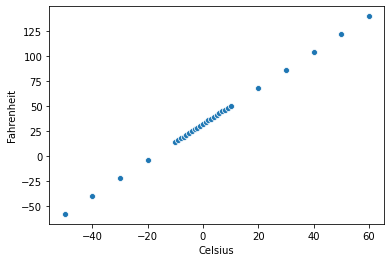

In [10]:
sns.scatterplot(temperature_df['Celsius'], temperature_df['Fahrenheit']);

# Etapa 4: Configuração da base de dados de treinamento

In [11]:
X_train = temperature_df['Celsius']
y_train = temperature_df['Fahrenheit']

In [12]:
X_train.shape

(30,)

In [13]:
y_train.shape

(30,)

# Etapa 5: Construção e treinamento do modelo

In [14]:
model = tf.keras.Sequential() # fornece recursos de treinamento e inferência neste modelo.
# classe tf.keras.Sequential é uma sequência de camadas

# agora vamos adicionar uma camada
# rede neural densa tf.keras.layers.Dense significa que um neurônio de uma 
# camada é ligada com todos os outros neurônios da próxima camada
# Nesta linha de código estamos construindo nosso modelo com um entrada que é o input_shape e uma saída que é o unit
# Portanto teremos um neurônio de entrada e um neurônio de saída
model.add(tf.keras.layers.Dense(units = 1, input_shape = [1]))

# Resumo do modelo e verificamos que temos apenas dois parâmetros(Total params: 2) que significam os pesos
# Um dos parâmetros é o w1 e o outro é o bias
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Vamos agora compilar o modelo antes de executá-lo
# Algoritmo tf.keras.optimizers.Adam que iremos utilizar tem a idéia da descida do gradiente
# 0.1 é a taxa de aprendizagem
# loss é a função do erro
model.compile(optimizer=tf.keras.optimizers.Adam(0.1), loss = 'mean_squared_error')

In [16]:
# epochs é um número que significa quantas vezes iremos realizar o treinamento
epochs_hist = model.fit(X_train, y_train, epochs = 500)

# observe que no início o erro é maior
# na última época o erro é menor
#Epoch 500/500
#1/1 [==============================] - 0s 1ms/step - loss: 2.0908e-09
# 2.0908e-09  é  0.0000000020908

# erro é a diferença do que a rede neural previu e o valor real 

Epoch 1/500
1/1 [==============================] - 1s 535ms/step - loss: 3203.1545
Epoch 2/500
1/1 [==============================] - 0s 7ms/step - loss: 2990.7449
Epoch 3/500
1/1 [==============================] - 0s 26ms/step - loss: 2788.8540
Epoch 4/500
1/1 [==============================] - 0s 17ms/step - loss: 2597.6443
Epoch 5/500
1/1 [==============================] - 0s 13ms/step - loss: 2417.2532
Epoch 6/500
1/1 [==============================] - 0s 14ms/step - loss: 2247.7761
Epoch 7/500
1/1 [==============================] - 0s 9ms/step - loss: 2089.2717
Epoch 8/500
1/1 [==============================] - 0s 9ms/step - loss: 1941.7559
Epoch 9/500
1/1 [==============================] - 0s 6ms/step - loss: 1805.1967
Epoch 10/500
1/1 [==============================] - 0s 19ms/step - loss: 1679.5112
Epoch 11/500
1/1 [==============================] - 0s 27ms/step - loss: 1564.5641
Epoch 12/500
1/1 [==============================] - 0s 16ms/step - loss: 1460.1624
Epoch 13/500
1/1

1/1 [==============================] - 0s 5ms/step - loss: 515.0098
Epoch 102/500
1/1 [==============================] - 0s 3ms/step - loss: 511.1727
Epoch 103/500
1/1 [==============================] - 0s 7ms/step - loss: 507.3577
Epoch 104/500
1/1 [==============================] - 0s 5ms/step - loss: 503.5654
Epoch 105/500
1/1 [==============================] - 0s 6ms/step - loss: 499.7958
Epoch 106/500
1/1 [==============================] - 0s 6ms/step - loss: 496.0492
Epoch 107/500
1/1 [==============================] - 0s 6ms/step - loss: 492.3256
Epoch 108/500
1/1 [==============================] - 0s 8ms/step - loss: 488.6248
Epoch 109/500
1/1 [==============================] - 0s 8ms/step - loss: 484.9468
Epoch 110/500
1/1 [==============================] - 0s 6ms/step - loss: 481.2912
Epoch 111/500
1/1 [==============================] - 0s 6ms/step - loss: 477.6577
Epoch 112/500
1/1 [==============================] - 0s 4ms/step - loss: 474.0462
Epoch 113/500
1/1 [===========

1/1 [==============================] - 0s 5ms/step - loss: 230.2254
Epoch 201/500
1/1 [==============================] - 0s 16ms/step - loss: 228.1976
Epoch 202/500
1/1 [==============================] - 0s 13ms/step - loss: 226.1843
Epoch 203/500
1/1 [==============================] - 0s 14ms/step - loss: 224.1853
Epoch 204/500
1/1 [==============================] - 0s 9ms/step - loss: 222.2009
Epoch 205/500
1/1 [==============================] - 0s 9ms/step - loss: 220.2306
Epoch 206/500
1/1 [==============================] - 0s 7ms/step - loss: 218.2745
Epoch 207/500
1/1 [==============================] - 0s 8ms/step - loss: 216.3326
Epoch 208/500
1/1 [==============================] - 0s 17ms/step - loss: 214.4046
Epoch 209/500
1/1 [==============================] - 0s 6ms/step - loss: 212.4907
Epoch 210/500
1/1 [==============================] - 0s 19ms/step - loss: 210.5908
Epoch 211/500
1/1 [==============================] - 0s 16ms/step - loss: 208.7046
Epoch 212/500
1/1 [=====

1/1 [==============================] - 0s 13ms/step - loss: 88.9461
Epoch 300/500
1/1 [==============================] - 0s 14ms/step - loss: 88.0250
Epoch 301/500
1/1 [==============================] - 0s 5ms/step - loss: 87.1120
Epoch 302/500
1/1 [==============================] - 0s 4ms/step - loss: 86.2071
Epoch 303/500
1/1 [==============================] - 0s 4ms/step - loss: 85.3101
Epoch 304/500
1/1 [==============================] - 0s 5ms/step - loss: 84.4211
Epoch 305/500
1/1 [==============================] - 0s 6ms/step - loss: 83.5399
Epoch 306/500
1/1 [==============================] - 0s 6ms/step - loss: 82.6665
Epoch 307/500
1/1 [==============================] - 0s 11ms/step - loss: 81.8009
Epoch 308/500
1/1 [==============================] - 0s 8ms/step - loss: 80.9431
Epoch 309/500
1/1 [==============================] - 0s 10ms/step - loss: 80.0929
Epoch 310/500
1/1 [==============================] - 0s 16ms/step - loss: 79.2503
Epoch 311/500
1/1 [==================

1/1 [==============================] - 0s 6ms/step - loss: 28.8696
Epoch 400/500
1/1 [==============================] - 0s 12ms/step - loss: 28.5214
Epoch 401/500
1/1 [==============================] - 0s 24ms/step - loss: 28.1770
Epoch 402/500
1/1 [==============================] - 0s 15ms/step - loss: 27.8362
Epoch 403/500
1/1 [==============================] - 0s 10ms/step - loss: 27.4991
Epoch 404/500
1/1 [==============================] - 0s 11ms/step - loss: 27.1655
Epoch 405/500
1/1 [==============================] - 0s 3ms/step - loss: 26.8356
Epoch 406/500
1/1 [==============================] - 0s 3ms/step - loss: 26.5091
Epoch 407/500
1/1 [==============================] - 0s 4ms/step - loss: 26.1862
Epoch 408/500
1/1 [==============================] - 0s 4ms/step - loss: 25.8667
Epoch 409/500
1/1 [==============================] - 0s 4ms/step - loss: 25.5507
Epoch 410/500
1/1 [==============================] - 0s 6ms/step - loss: 25.2381
Epoch 411/500
1/1 [==================

1/1 [==============================] - 0s 8ms/step - loss: 7.7395


# Etapa 5: Avaliação do modelo

In [17]:
epochs_hist.history.keys()

dict_keys(['loss'])

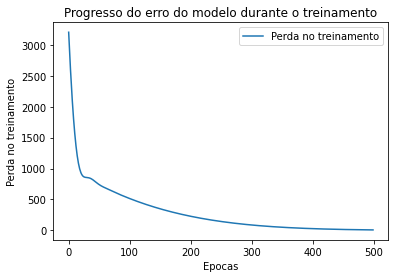

In [18]:
# Este gráfico é interessante para verificar o quanto você deve definir o número de épocas
plt.plot(epochs_hist.history['loss']) # historico de erro
plt.title('Progresso do erro do modelo durante o treinamento')
plt.xlabel('Epocas')
plt.ylabel('Perda no treinamento')
plt.legend(['Perda no treinamento']); # ponto e vírgula retira <matplotlib.legend.Legend at 0x2173cd06248> 

In [19]:
# busca os pesos do modelo
model.get_weights()

# se verificamos que 32 é um dos valores da fórmula
# valores próximo a 1.8 sigifica 9/5

[array([[1.8111379]], dtype=float32), array([29.22637], dtype=float32)]

In [20]:
temp_c = 0
temp_f = model.predict([temp_c])
temp_f

array([[29.22637]], dtype=float32)

In [21]:
temp_f1 = 9/5 * temp_c + 32
temp_f1

32.0